In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
data_path = 'D:/Predicting_pregnancy_risks/data/pregnancy_data.csv'
data = pd.read_csv(data_path, encoding='ISO-8859-1')

In [4]:
data.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [5]:
data = data.drop(columns=['Name', 'Patient ID'])

In [6]:
print(data.columns)

Index(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


In [7]:
data.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,high risk
1,45,97.7,99,99,94,22.1,36,5.7,high risk
2,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,26,99.5,135,161,101,23.7,46,4.5,high risk
4,38,102.5,51,106,91,18.8,38,4.3,high risk


In [8]:
risk_mapping = {'high risk': 2, 'mid risk': 1, 'low risk': 0}
data['Outcome'] = data['Outcome'].map(risk_mapping)

In [9]:
print(data.head(10))

   Age  Body Temperature(F)   Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                  97.5               91                             161   
1   45                  97.7               99                              99   
2   29                  98.6               84                             129   
3   26                  99.5              135                             161   
4   38                 102.5               51                             106   
5   21                  98.6               85                             142   
6   23                  98.8               70                             141   
7   38                 101.1              141                             144   
8   42                 103.5              144                             124   
9   22                 100.1               62                             144   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100 

In [10]:
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric where possible
data.fillna(data.mean(), inplace=True)

In [11]:
data.isnull().sum()

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

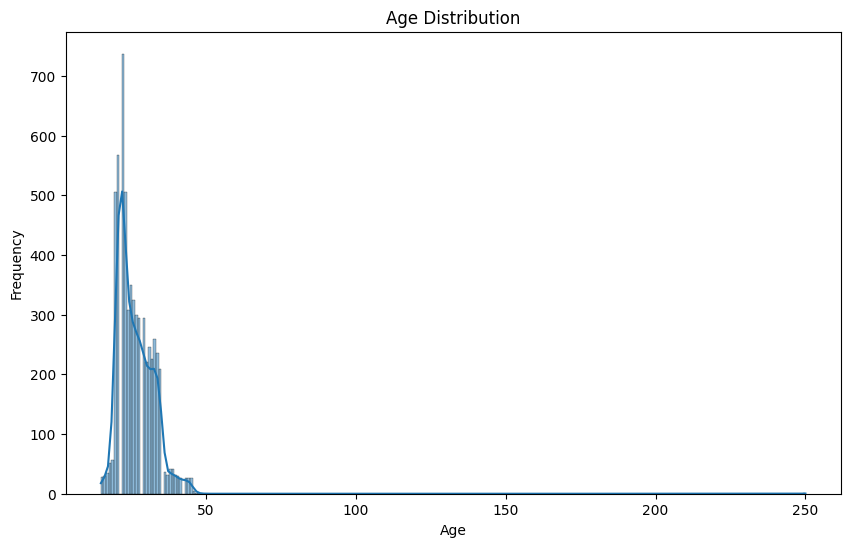

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

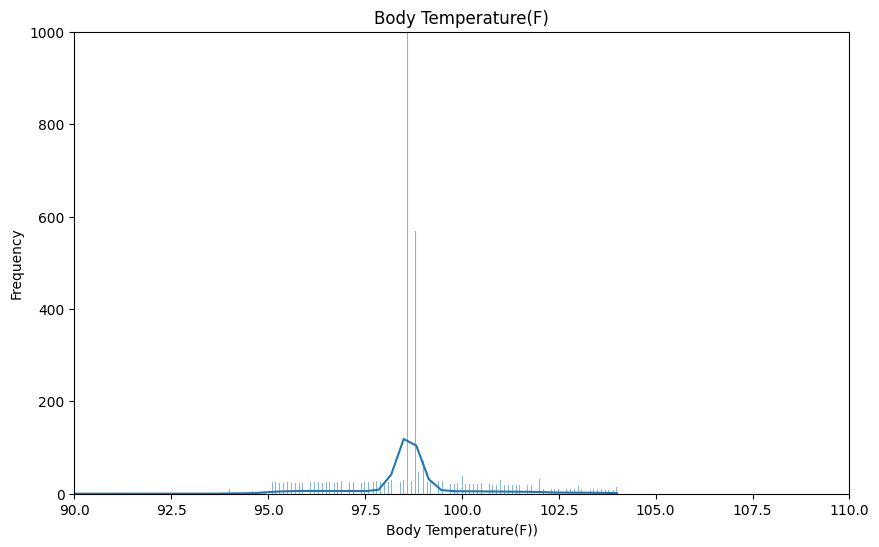

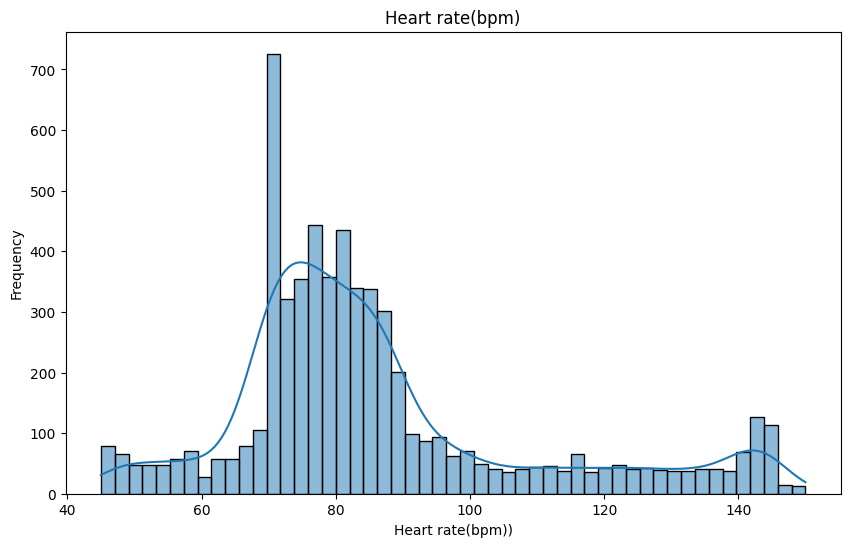

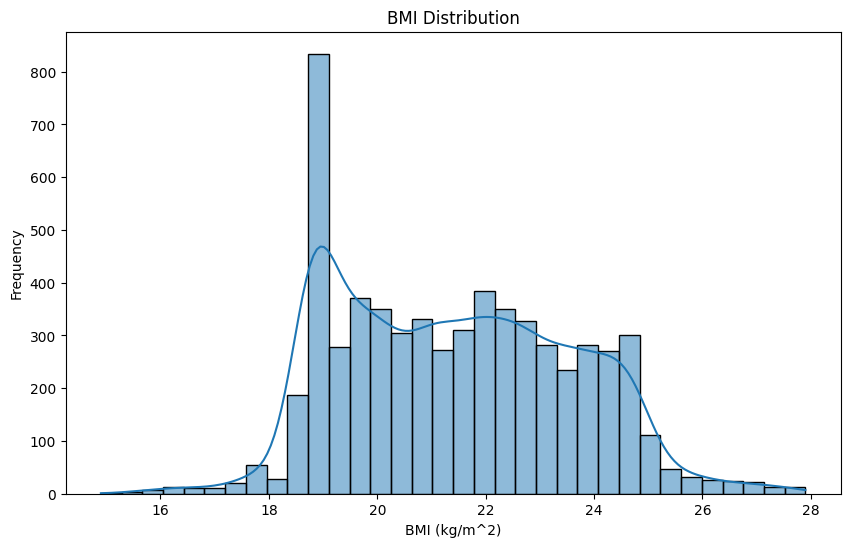

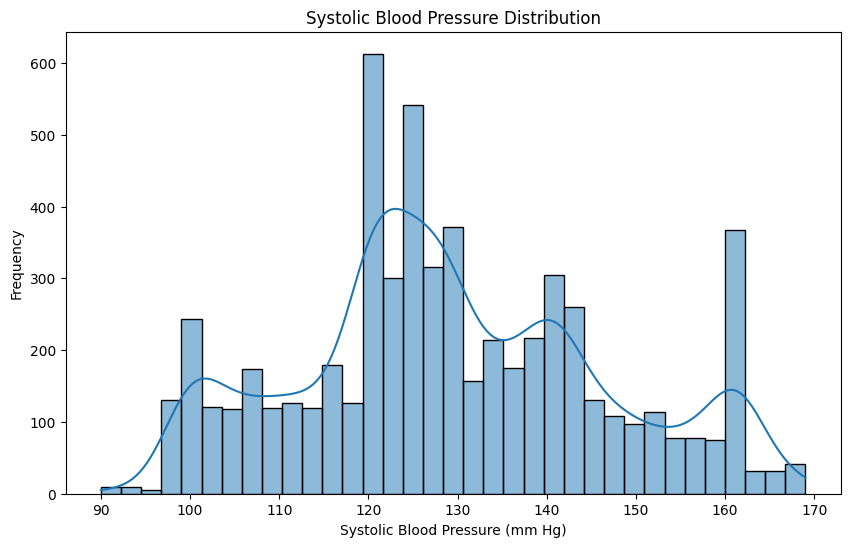

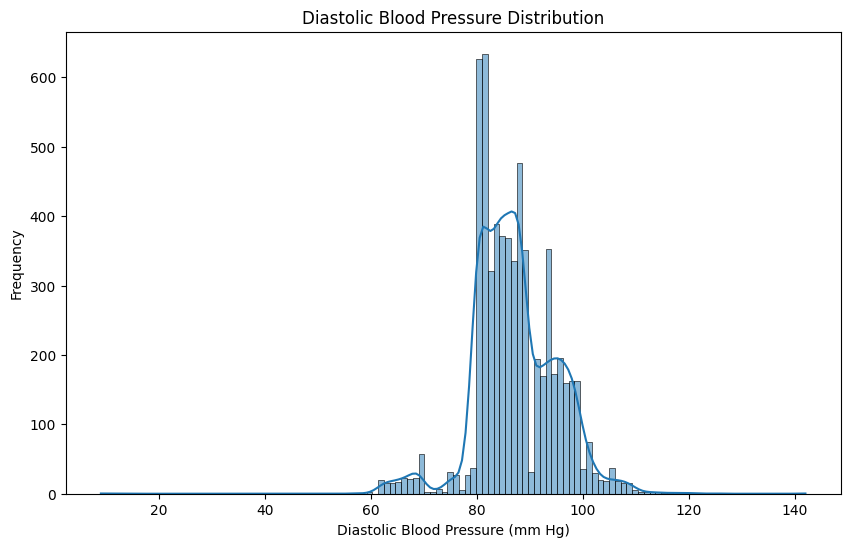

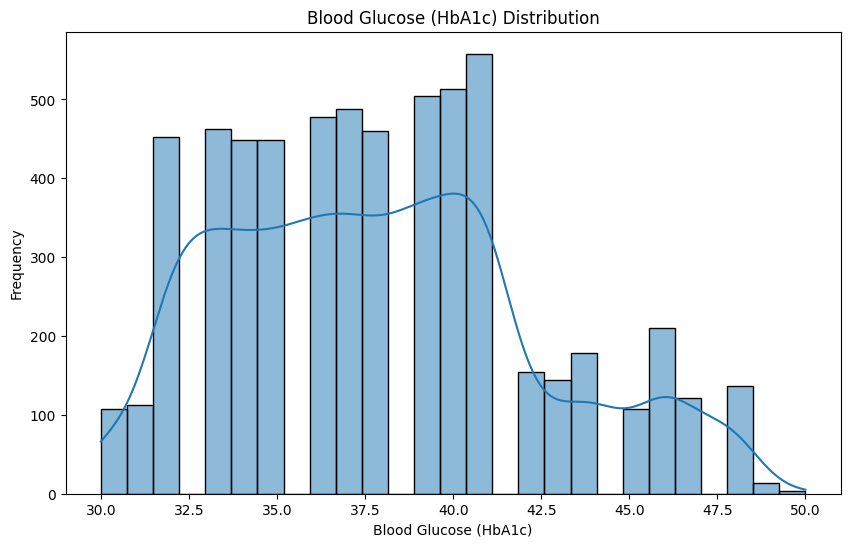

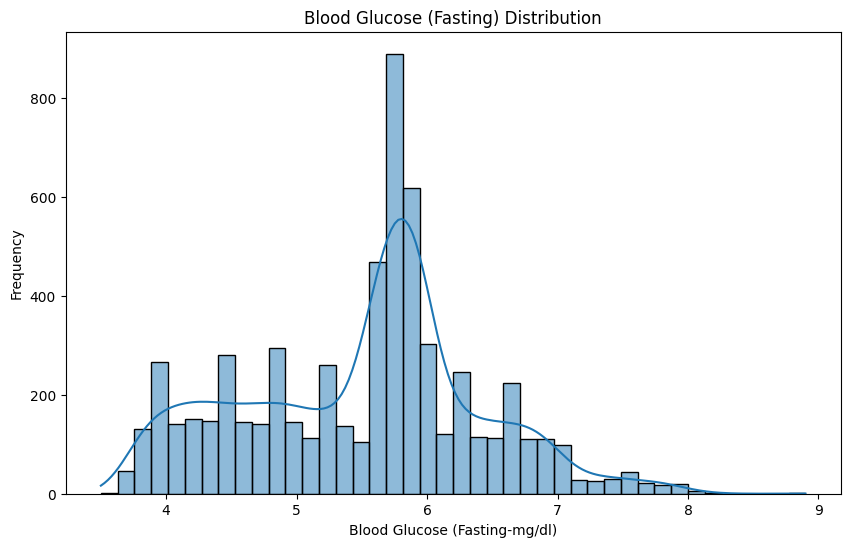

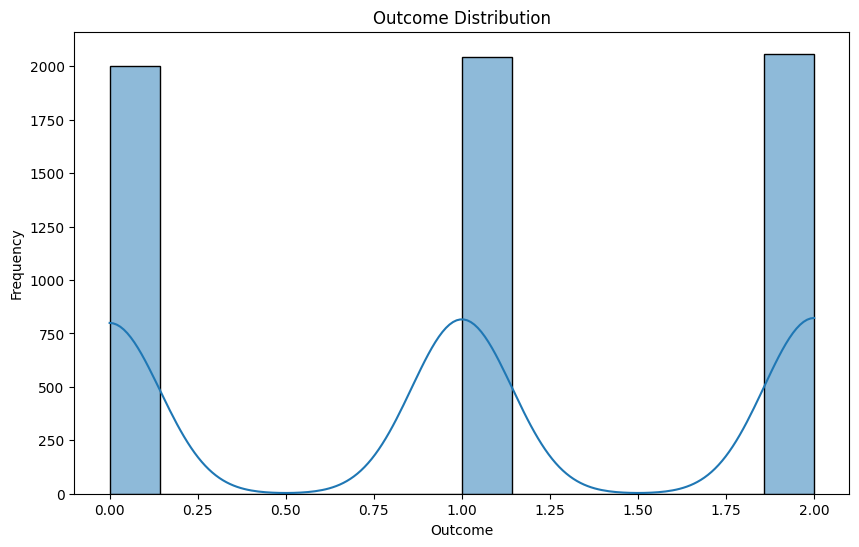

In [13]:
# Visualisation for BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['Body Temperature(F) '], kde=True)
plt.title('Body Temperature(F)')
plt.xlabel('Body Temperature(F))')
plt.ylabel('Frequency')
plt.xlim(90, 110)
plt.ylim(0, 1000)
plt.show()

# Visualisation for BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['Heart rate(bpm)'], kde=True)
plt.title('Heart rate(bpm)')
plt.xlabel('Heart rate(bpm))')
plt.ylabel('Frequency')
plt.show()

# Visualisation for BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI(kg/m 2)'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Frequency')
plt.show()

# Visualisation for 'Systolic Blood Pressure(mm Hg)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Systolic Blood Pressure(mm Hg)'], kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

# Visualisation for 'Diastolic Blood Pressure(mm Hg)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Diastolic Blood Pressure(mm Hg)'], kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

# Visualisation for 'Blood Glucose(HbA1c)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Blood Glucose(HbA1c)'], kde=True)
plt.title('Blood Glucose (HbA1c) Distribution')
plt.xlabel('Blood Glucose (HbA1c)')
plt.ylabel('Frequency')
plt.show()

# Visualisation  for 'Blood Glucose(Fasting hour - mg/dl)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Blood Glucose(Fasting hour-mg/dl)'], kde=True)
plt.title('Blood Glucose (Fasting) Distribution')
plt.xlabel('Blood Glucose (Fasting-mg/dl)')
plt.ylabel('Frequency')
plt.show()

# Visualisation  for 'Outcome'
plt.figure(figsize=(10, 6))
sns.histplot(data['Outcome'], kde=True)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

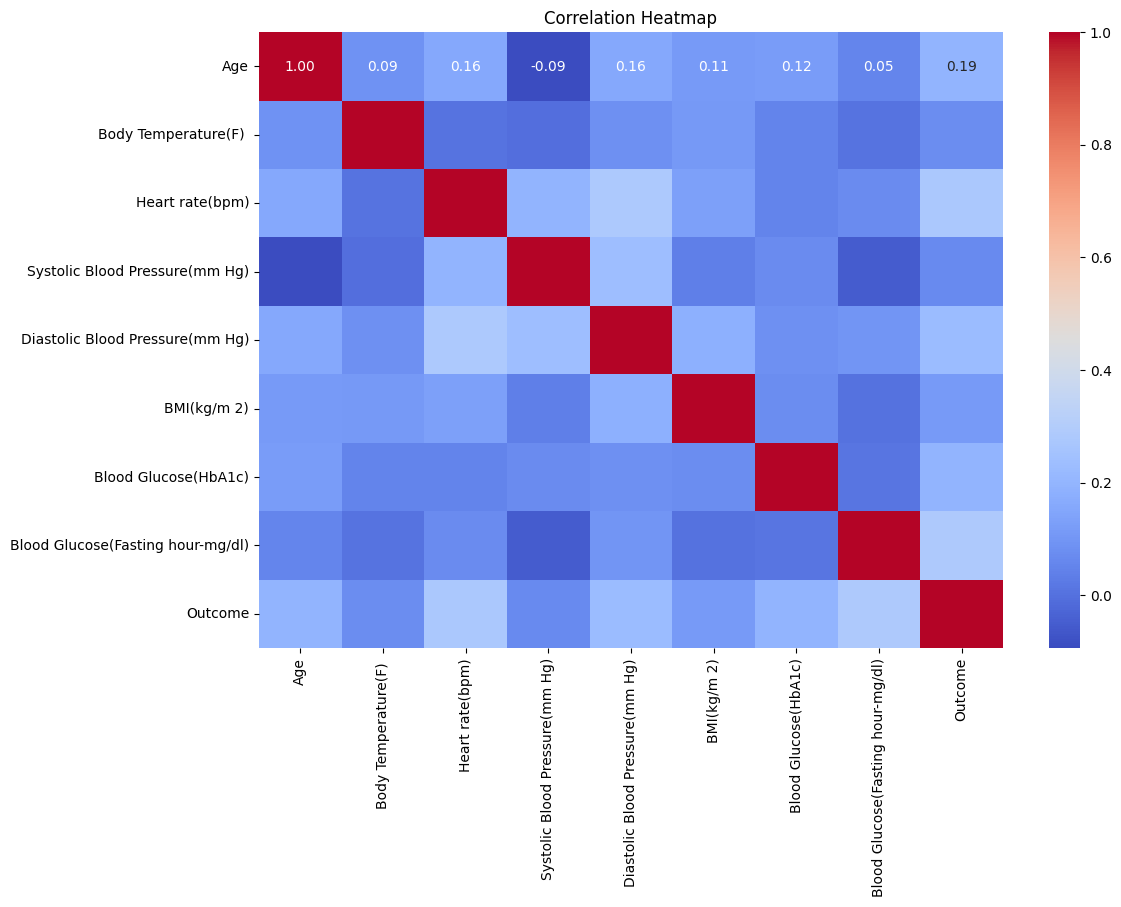

In [14]:

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 600x400 with 0 Axes>

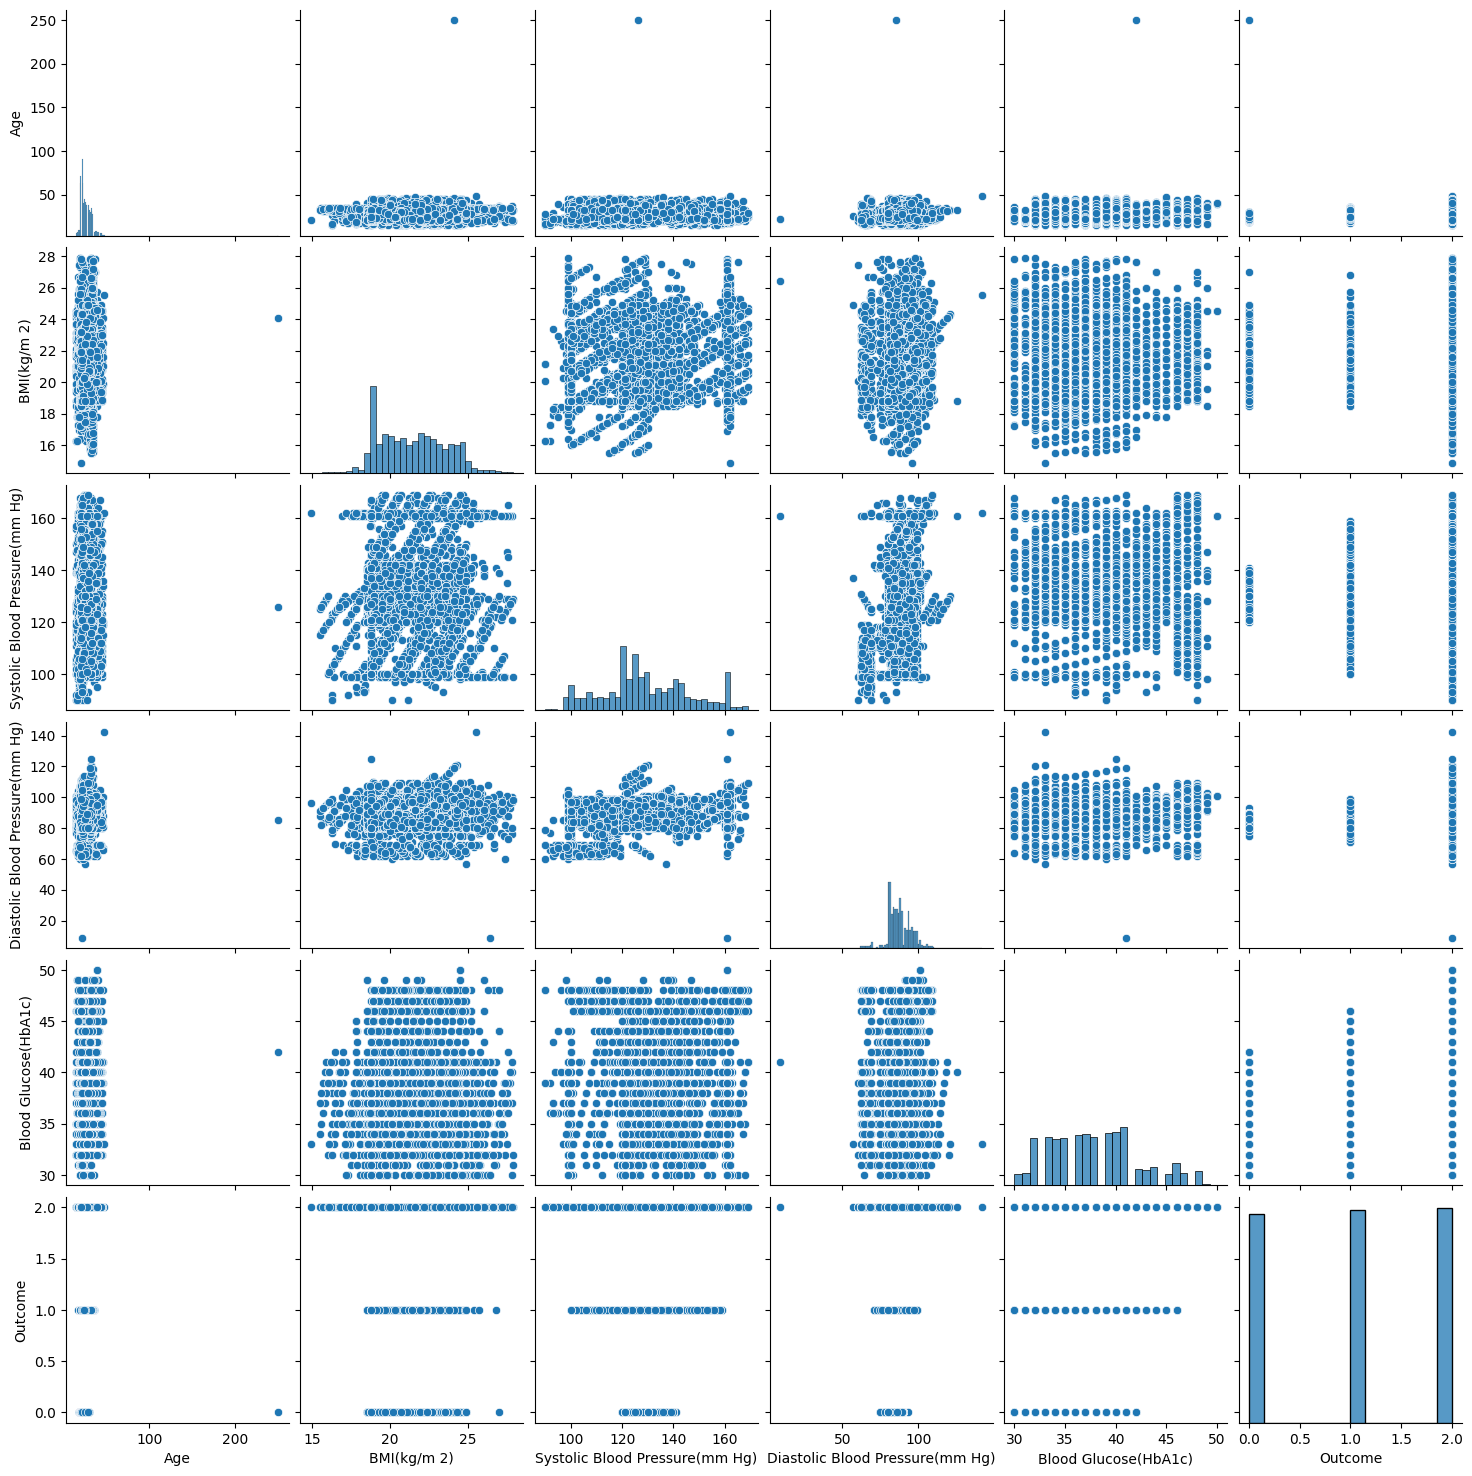

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(6, 4))
sns.pairplot(data[['Age', 'BMI(kg/m 2)', 'Systolic Blood Pressure(mm Hg)', 
                   'Diastolic Blood Pressure(mm Hg)', 'Blood Glucose(HbA1c)', 'Outcome']])

plt.show()


In [16]:
import os
model_dir = r'D:\Predicting_pregnancy_risks\models'
os.makedirs(model_dir, exist_ok=True)

In [17]:
X = data.drop(columns='Outcome')  
y = data['Outcome']  

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print("Features in StandardScaler:", scaler.feature_names_in_)

Features in StandardScaler: ['Age' 'Body Temperature(F) ' 'Heart rate(bpm)'
 'Systolic Blood Pressure(mm Hg)' 'Diastolic Blood Pressure(mm Hg)'
 'BMI(kg/m 2)' 'Blood Glucose(HbA1c)' 'Blood Glucose(Fasting hour-mg/dl)']


In [22]:
Using Random Forest for Bettetr accuracy

SyntaxError: invalid syntax (712052640.py, line 1)

In [ ]:
scaler_path = os.path.join(model_dir, 'scaler.pkl')
model_path = os.path.join(model_dir, 'rf_model.pkl')
joblib.dump(scaler, scaler_path)
joblib.dump(model_rf, model_path)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'Mid Risk', 'High Risk'],  # Modify if necessary
            yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether to use bootstrap samples
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluate the model with best parameters
y_pred_best = best_rf_model.predict(X_test_scaled)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

# Save the best model
best_model_path = os.path.join(model_dir, 'best_rf_model.pkl')
joblib.dump(best_rf_model, best_model_path)

# Load the saved model for prediction
best_rf_model = joblib.load(best_model_path)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'Mid Risk', 'High Risk'],  # Modify if necessary
            yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance
importances = best_rf_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
Function to start Predicting and to take user input


In [ ]:
import joblib
import pandas as pd
import os

# Ensure these paths are correct
model_dir = r'D:\Predicting_pregnancy_risks\models'
scaler_path = os.path.join(model_dir, 'scaler.pkl')
best_model_path = os.path.join(model_dir, 'best_rf_model.pkl')

# Load the scaler and the best model
scaler = joblib.load(scaler_path)
best_rf_model = joblib.load(best_model_path)

def predict():
    print("Please enter the following details:")
    try:
        # Collect input from the user
        age = input("Age: ")
        while True:
            body_temperature = input("Body Temperature(F): ")
            try:
                body_temperature = float(body_temperature)
                # Check if body temperature is within a valid range (98°F - 110°F)
                if body_temperature < 98 or body_temperature > 110:
                    print("Please enter a body temperature between 98°F and 110°F.")
                else:
                    break  # Break the loop if the input is valid
            except ValueError:
                print("Invalid input. Please enter a valid numerical value for body temperature.")

        heart_rate = input("Heart Rate(bpm): ")
        systolic_bp = input("Systolic Blood Pressure(mm Hg): ")
        diastolic_bp = input("Diastolic Blood Pressure(mm Hg): ")
        bmi = input("BMI(kg/m 2): ")
        hb_a1c = input("Blood Glucose(HbA1c): ")
        blood_glucose = input("Blood Glucose (Fasting hour - mg/dl): ")

        # Convert inputs to float and check for valid numerical values
        try:
            age = float(age)
            body_temperature = float(body_temperature)
            heart_rate = float(heart_rate)
            systolic_bp = float(systolic_bp)
            diastolic_bp = float(diastolic_bp)
            bmi = float(bmi)
            hb_a1c = float(hb_a1c)
            blood_glucose = float(blood_glucose)
        except ValueError:
            print("Invalid input. Please enter valid numerical values.")
            return  # Exit the function if input is invalid

        # Combine input into a single array
        input_data = [[age, body_temperature, heart_rate, systolic_bp,
                      diastolic_bp, bmi, hb_a1c, blood_glucose]]

        # Define the correct column names (ensure they match exactly with your trained model)
        column_names = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
                        'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 
                        'Blood Glucose(Fasting hour-mg/dl)']
        
        # Convert input_data into a DataFrame with the correct column names
        input_data_df = pd.DataFrame(input_data, columns=column_names)

        # Print the DataFrame to check if the data looks correct
        print("Input Data (before scaling):")
        print(input_data_df)

        # Scale the input data
        input_data_scaled = scaler.transform(input_data_df)

        # Print the scaled data to verify
        print("Scaled Input Data:")
        print(input_data_scaled)

        # Make a prediction
        prediction = best_rf_model.predict(input_data_scaled)

        # Map numerical predictions to human-readable risk levels
        risk_levels = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}
        risk_level = risk_levels.get(prediction[0], "Unknown Risk Level")

        print(f"Predicted Risk Level: {risk_level}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Call the predict function
predict()

